In [145]:
from helper import *

In [146]:
raw_data_folder_path = "./raw_data/"
preprocessed_data_folder_path = "./preprocessed_data/"
save_data_folder_path = "./save_data/"
images_folder_path = "./images/"
statistics_folder_path = "statistics/"
mhw_objects_folder_path = "mhw_objects/"

folders = Folders(
    end_folder = "",
    raw_data = raw_data_folder_path,
    preprocessed_data = preprocessed_data_folder_path,
    save_data = save_data_folder_path,
    images = images_folder_path,
    statistics=statistics_folder_path,
    mhw_objects=mhw_objects_folder_path
)


filenames014 = [
    "ACP_INP0014_REST1_1pnt_1vis",
    "ACP_INP0014_REST2_1pnt_1vis",
    "ACP_INP0014_REST3_1pnt_1vis",
    "ACP_INP0014_REST1_1pnt_2vis",
    "ACP_INP0014_REST2_1pnt_2vis",
    "ACP_INP0014_REST3_1pnt_2vis"
]
path014 = "rest_14/"

filenames019 = [
    "INP0019_v1.4_REST1_R003_R003_08.11.23",
    "INP0019_v1.4_REST2_R003_R003_08.11.23",
    "INP0019_v1.4_REST3_R003_R003_08.11.23",
    "INP0019_v1.5_REST2_Op005_Op007_08.12.23",
    "INP0019_v1.5_REST3_Op005_Op007_08.12.23",
]
path019 = "rest_19/"

filenames036 = [
    "INP0036_v1.4_REST1_Op008_Op011_11.12.23",
    "INP0036_v1.4_REST2_Op008_Op011_11.12.23",
    "INP0036_v1.4_REST3_Op008_Op011_11.12.23",
    "INP0036_v1.5_REST1_Op005_Op010_12.12.23",
    "INP0036_v1.5_REST2_Op005_Op010_12.12.23",
    "INP0036_v1.5_REST3_Op005_Op010_12.12.23",
]
path036 = "rest_36/"

filenames045 = [
    "INP0045_v1.4_REST1_R003_R003_08.11.23",
    "INP0045_v1.4_REST2_R003_R003_08.11.23",
    "INP0045_v1.4_REST3_R003_R003_08.11.23",
    "INP0045_v1.5_rs11_Op005_Op008_Op011_17.11.23",
    "INP0045_v1.5_rs22_Op005_Op008_Op011_17.11.23",
    "INP0045_v1.5_rs23_Op005_Op008_Op011_17.11.23",
]
path045 = "rest_45/"

filenames064 = [
    "INP0064_v1.4_rs11_S008_R003_04.12.23",
    "INP0064_v1.4_rs12_Op008_R003_04.12.23",
    "INP0064_v1.4_rs13_Op008_R003_04.12.23",
    "INP0064_v1.5_rs21_Op005_Op006_Op008_05.12.23",
    "INP0064_v1.5_rs22_Op009_A002_13.12.23",
    "INP0064_v1.5_rs23_Op009_A002_13.12.23",
]
path064 = "rest_64/"

filenames = [filenames014, filenames019, filenames036, filenames045, filenames064]
paths = [path014, path019, path036, path045, path064]

# Назначение нормативных карт

In [147]:
filename = filenames014[0]
path = path014
th_filename = filename+"_th"
folders.end_folder = path
raw = mne.io.read_raw_eeglab(folders.preprocessed_data + folders.end_folder + filenames014[0] + '.set')
mhw = MicrostateHelperWrapper(folders, raw, th_filename)
mhw = mhw.load()

C:\Users\bortn\AppData\Local\Temp\ipykernel_41744\2808348043.py:5: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(folders.preprocessed_data + folders.end_folder + filenames014[0] + '.set')


Loading MHW object ACP_INP0014_REST1_1pnt_1vis_th


C:\Users\bortn\AppData\Local\Temp\ipykernel_41744\2808348043.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(folders.preprocessed_data + folders.end_folder + filenames014[0] + '.set')


In [148]:
global_maps = pd.read_csv(folders.save_data + "global_maps.csv")
global_maps

,A,B,C,D
0,0.009410,0.011683,-0.084315,0.067991
1,-0.010530,0.020074,-0.088397,0.069857
2,-0.027919,0.039200,-0.085567,0.072701
3,0.049914,-0.030500,-0.101364,0.078310
4,0.041308,-0.055918,-0.122922,0.139854
...,...,...,...,...
56,0.161452,-0.120289,0.020834,-0.067826
57,-0.150399,0.182519,0.048983,-0.055031
58,0.186994,-0.142777,0.133235,-0.159450
59,-0.125913,0.173533,0.177644,-0.165471


In [149]:
mhw.calc_normative_labels(global_maps)

Calculating normative labels...


D:\nsu-microstate-rest-eeg\helper.py:559: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  remap_df_inv = pd.concat([


In [150]:
ms_clone = mhw.ms.copy()
# ms_clone["Sequence"]= list(map((lambda x: remapper[x]), mhw.ms["Sequence"]))
# ms_clone

In [151]:
mhw.normative_labels

,Distance_A,Distance_B,Distance_C,Distance_D,label,inv
1,0.884511,1.489178,0.613098,1.794443,A,True
0,1.794075,0.282814,1.163525,1.397206,B,False
2,1.140570,1.433835,0.582613,1.738869,C,False
3,1.150107,1.514398,1.775402,0.439416,D,True


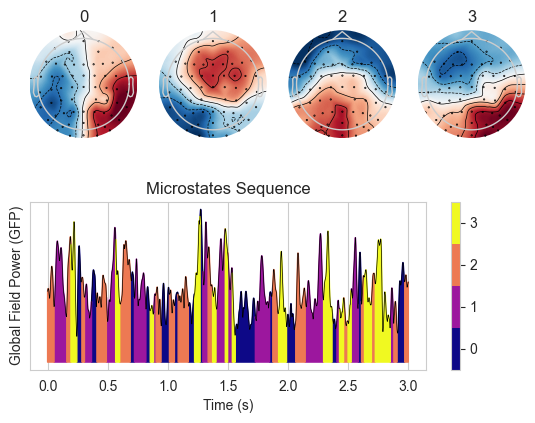

In [152]:
nk.microstates_plot(mhw.ms, epoch=(0, 2048*3))

In [153]:
print(mhw.normative_labels.T[0].label)
print(mhw.normative_labels.T[1].label)
print(mhw.normative_labels.T[2].label)
print(mhw.normative_labels.T[3].label)


B
A
C
D


In [154]:
def create_remapper(normative_labels):
    label_idx_remapper = {
        "A": 0,
        "B": 1,
        "C": 2,
        "D": 3
    }
    idx_idx_remapper = {}
    for i in range(4):
        idx_idx_remapper[i] = label_idx_remapper[normative_labels[i]["label"]]
    return idx_idx_remapper
remapper = create_remapper(mhw.normative_labels.T)
remapper

{0: 1, 1: 0, 2: 2, 3: 3}

In [189]:
def reorder_microstates(ms, remapper, normative_labels):
    ms_clone_1 = copy.deepcopy(ms)
    for i in range(len(ms["Sequence"])):
        ms_clone_1["Sequence"][i] = remapper[ms["Sequence"][i]]
    ms_array_clone = ms_clone_1["Microstates"].copy()
    for i in range(4):
        ms_clone_1["Microstates"][i] = (ms_array_clone[remapper[i]] * (-1 if normative_labels.T[remapper[i]].inv else 1))

    return ms_clone_1

In [190]:
ms_clone_reordered = reorder_microstates(ms_clone, remapper, mhw.normative_labels)
# print(ms_clone_reordered["Microstates"])

In [191]:
# print(mhw.ms["Microstates"])

In [192]:
# print(mhw.ms["Sequence"][500:1000])

In [193]:
# print(ms_clone_reordered["Sequence"][500:1000])

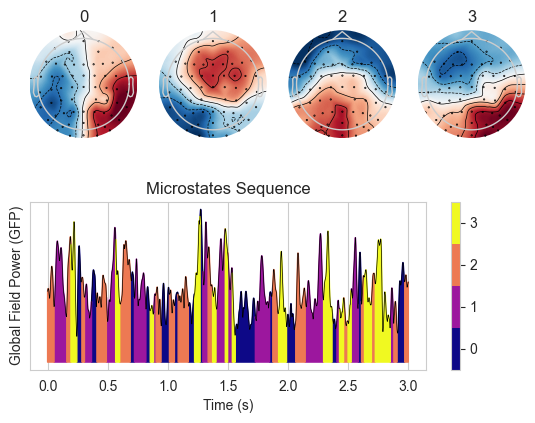

In [194]:
nk.microstates_plot(mhw.ms, epoch=(0, 2048*3))

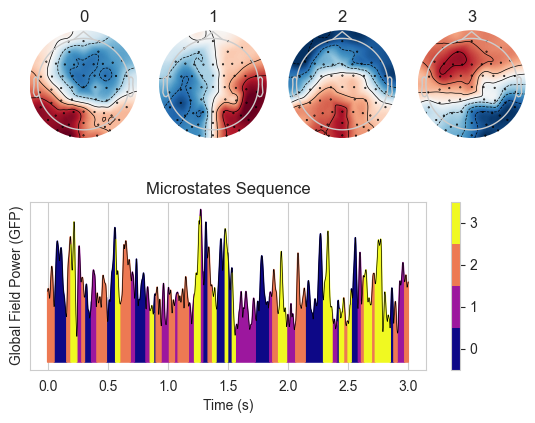

In [195]:
nk.microstates_plot(ms_clone_reordered, epoch=(0, 2048*3))

,Microstate_0_Proportion,Microstate_1_Proportion,Microstate_2_Proportion,Microstate_3_Proportion,Microstate_0_LifetimeDistribution,Microstate_1_LifetimeDistribution,Microstate_2_LifetimeDistribution,Microstate_3_LifetimeDistribution,Microstate_0_DurationMean,Microstate_0_DurationMedian,Microstate_1_DurationMean,Microstate_1_DurationMedian,Microstate_2_DurationMean,Microstate_2_DurationMedian,Microstate_3_DurationMean,Microstate_3_DurationMedian,Microstate_Average_DurationMean,Microstate_Average_DurationMedian
0,0.228863,0.249934,0.251399,0.269803,2077.5,2097.5,1977.5,2176.5,0.111617,0.089,0.120732,0.096,0.128807,0.097,0.1256,0.098,0.121648,0.095


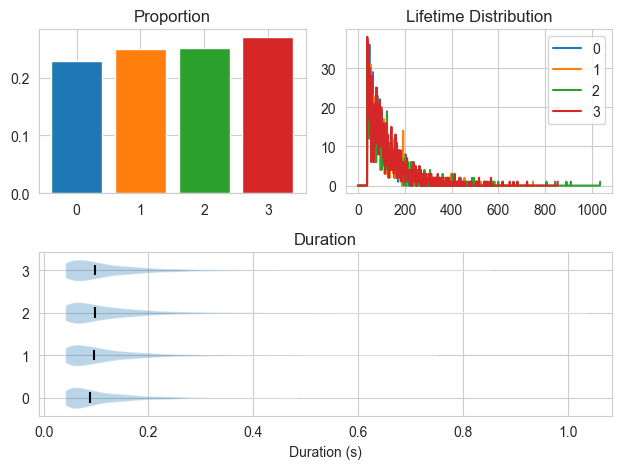

In [196]:
nk.microstates_static(ms_clone, show=True)

,Microstate_0_Proportion,Microstate_1_Proportion,Microstate_2_Proportion,Microstate_3_Proportion,Microstate_0_LifetimeDistribution,Microstate_1_LifetimeDistribution,Microstate_2_LifetimeDistribution,Microstate_3_LifetimeDistribution,Microstate_0_DurationMean,Microstate_0_DurationMedian,Microstate_1_DurationMean,Microstate_1_DurationMedian,Microstate_2_DurationMean,Microstate_2_DurationMedian,Microstate_3_DurationMean,Microstate_3_DurationMedian,Microstate_Average_DurationMean,Microstate_Average_DurationMedian
0,0.249934,0.228863,0.251399,0.269803,2097.5,2077.5,1977.5,2176.5,0.120732,0.096,0.111617,0.089,0.128807,0.097,0.1256,0.098,0.121648,0.095


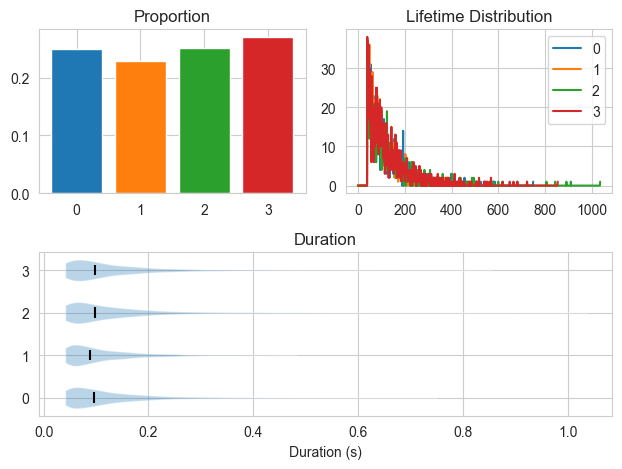

In [197]:
nk.microstates_static(ms_clone_reordered, show=True)